#### Imports

In [1]:
import numpy as np
import os

from spiegelib.estimator import ParameterLoss
from matplotlib import pyplot as plt
import seaborn as sns
import spiegelib as spgl
import itertools

sns.set_theme()

#### All metrics are defined here

In [2]:
def calculateMPE(truePatches, predictedPatches):
    """
    Calculates the mean absolute parameter error
    Args:
        truePatches:
        predictedPatches:

    Returns: a list of mean errors for each parameter and std errors
    """
    errors = []
    for true, predicted in zip(truePatches, predictedPatches):
        patchErrors = []
        for trueParam, predictedParam in zip(true, predicted):
            error = abs(trueParam - predictedParam)
            patchErrors.append(error)
        errors.append(patchErrors)
    errors_mean = np.mean(np.array(errors), axis=0)
    errors_std = np.std(np.array(errors), axis=0)
    return errors_mean, errors_std

### Load all data

In [3]:
datasetName = "evaluation"

automatableKeys = np.load("../data/presets/lfo/automatable_12.npy", allow_pickle=True)
parameterModel = np.load("../data/presets/allParamsUpdatedNew.npy", allow_pickle=True)

#True audio and patches
true_audio = spgl.AudioBuffer.load_folder(f"../data/{datasetName}/audio")
true_patch = np.load(f"../data/{datasetName}/patch/patches.npy", allow_pickle=True)


#Load all configs:

#Run all configurations!
allBins = [4, 8, 12, 16]
allDatasets = ["uniform", "normal", "preset"]
pred_audio = {}
pred_patch = {}

for dataset, bins in list(itertools.product(allDatasets, allBins)):
    pred_audio[(dataset, bins)] = [spgl.AudioBuffer.load_folder(f"../data/{datasetName}/predict_{dataset}_{bins}")]
    pred_patch[(dataset, bins)] = np.load(f"../data/{datasetName}/predict_{dataset}_{bins}/params.npy", allow_pickle=True)


C:\Users\hugod\Anaconda3\envs\spiegelib\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


### Plot MPE

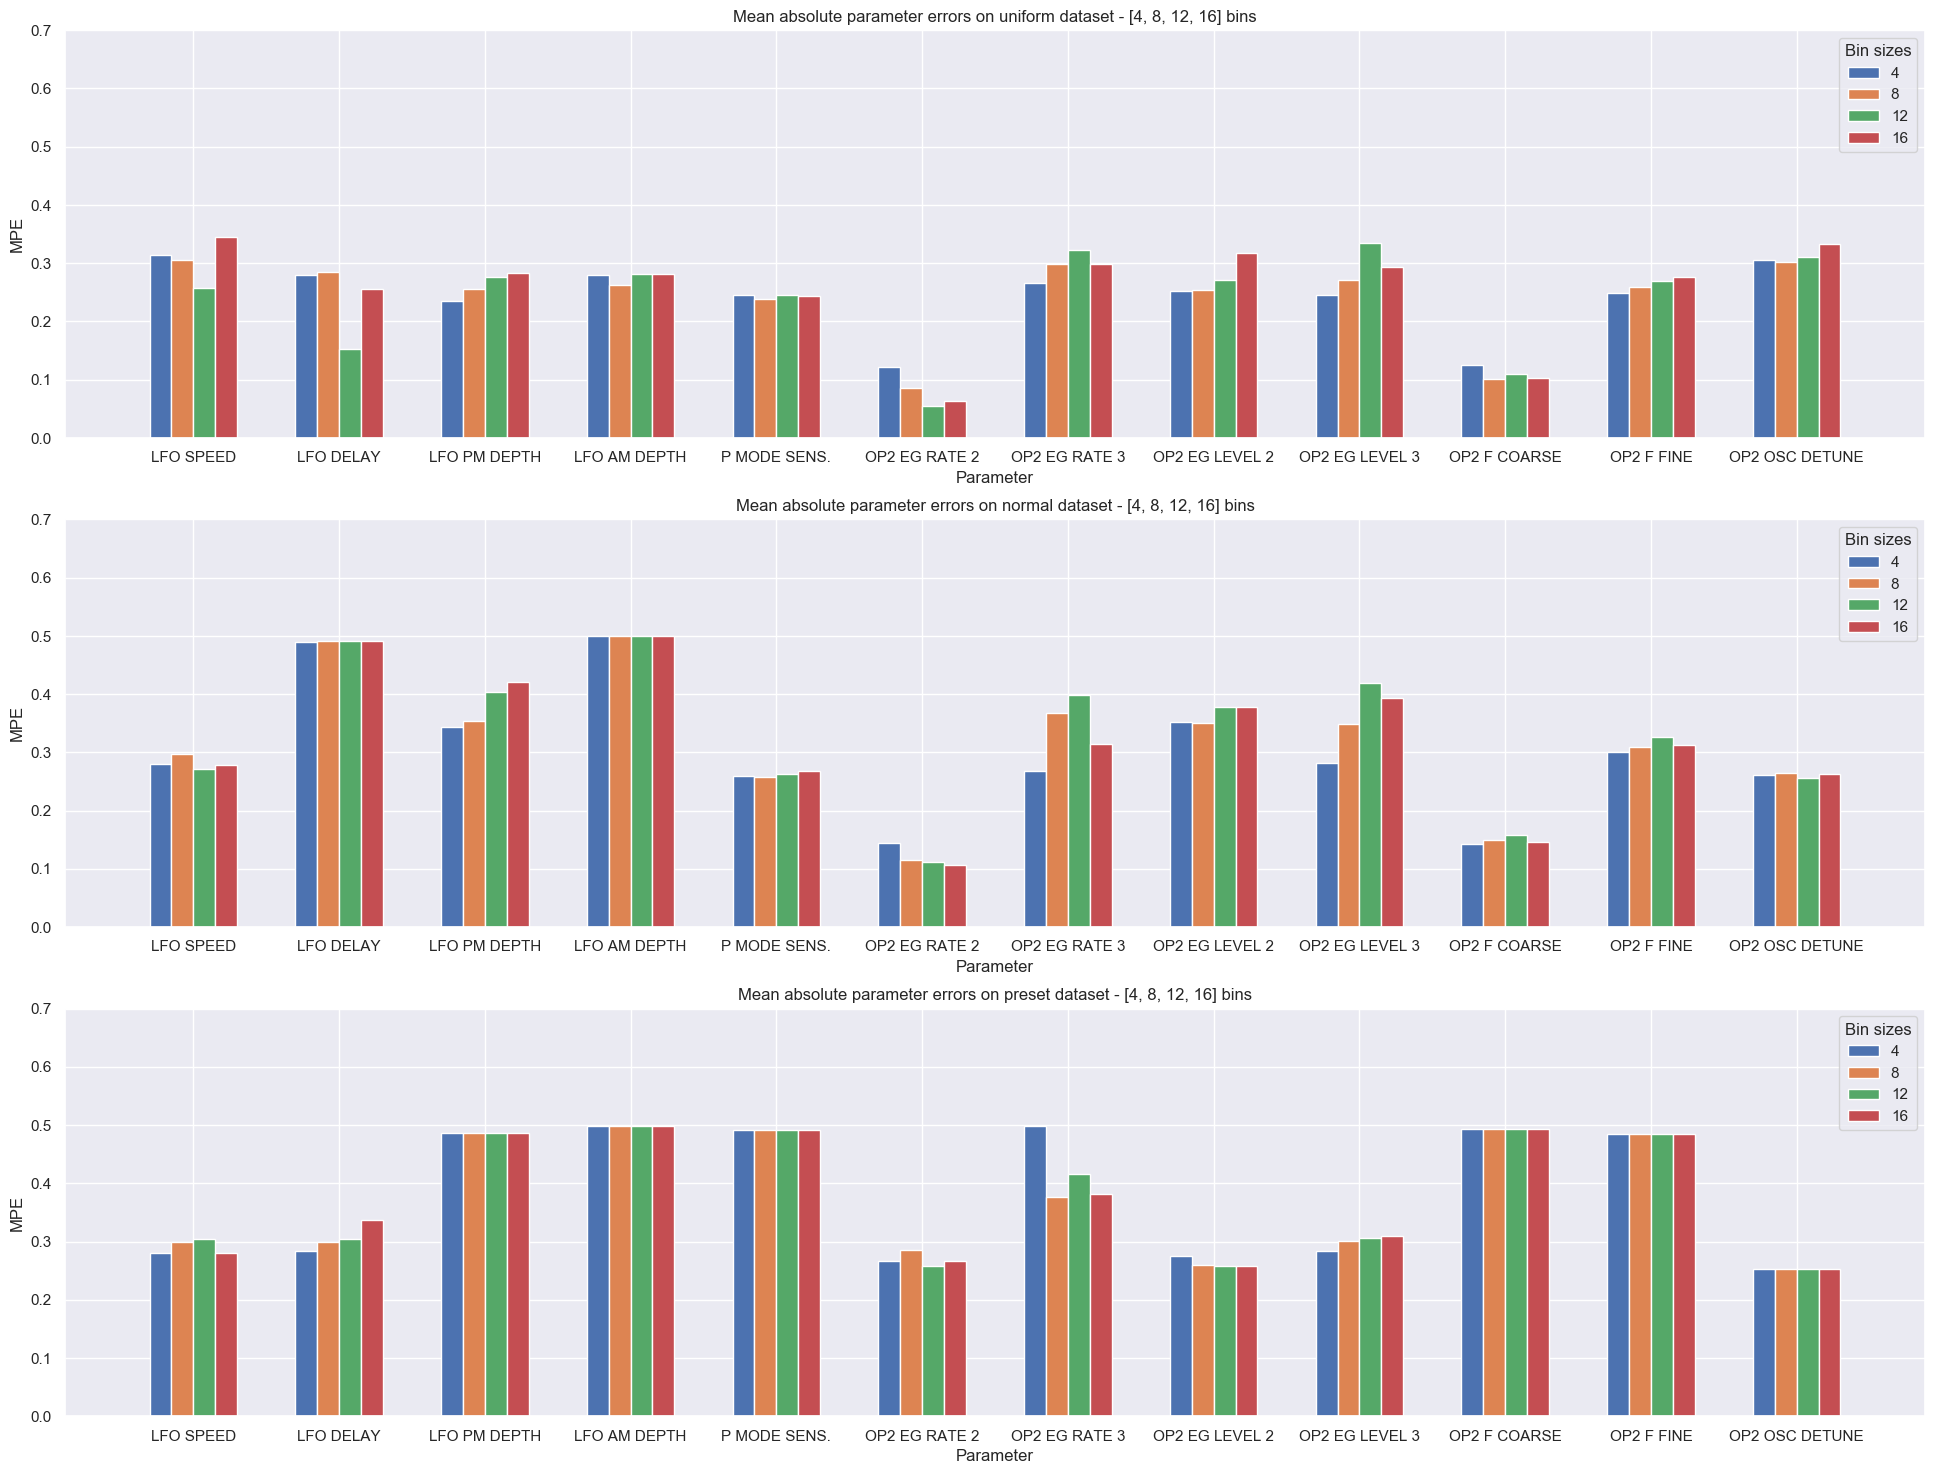

In [4]:
#Generate 3 plots for each dataset (now only 2)

fix, axes = plt.subplots(3, 1, figsize=(2 * len(automatableKeys), 18))

n = len(automatableKeys)
r = np.arange(n)

for ax, currDataset in zip(axes, allDatasets[:3]):
    width = 0.15
    position = - width * 1.5
    x_bar = [x['name'] for x in parameterModel[automatableKeys]]
    for bin in allBins:
        mpe, mpe_std = calculateMPE(true_patch, pred_patch[(currDataset, bin)])
        ax.bar(r + position, height=mpe, width= width)
        position += width
    ax.legend(allBins, title="Bin sizes")
    ax.set_xlabel("Parameter")
    ax.set_ylabel("MPE")
    ax.set_title(f"Mean absolute parameter errors on {currDataset} dataset - {str(allBins)} bins")
    ax.set_xticks(r)
    ax.set_xticklabels(x_bar)
    ax.set_ylim(0,0.7)

plt.savefig("../data/plots/MPE.png")

plt.show()

### Plot MFCC

{'source_0': {'mean_abs_error': {'mean': 27.977864265441895, 'median': 28.443253929138184, 'std': 12.252703570820772, 'min': 4.5639214515686035, 'max': 64.20526885986328}, 'mean_squared_error': {'mean': 1377.1612548828125, 'median': 1913.3640378875732, 'std': 1832.6850641151134, 'min': 37.902870178222656, 'max': 11614.9951171875}, 'euclidian_distance': {'mean': 1547.9856567382812, 'median': 1647.605598815918, 'std': 783.9956621524217, 'min': 256.80926513671875, 'max': 4495.56298828125}, 'manhattan_distance': {'mean': 48681.484375, 'median': 49491.26186669922, 'std': 21319.70425196751, 'min': 7941.22314453125, 'max': 111717.1640625}}}


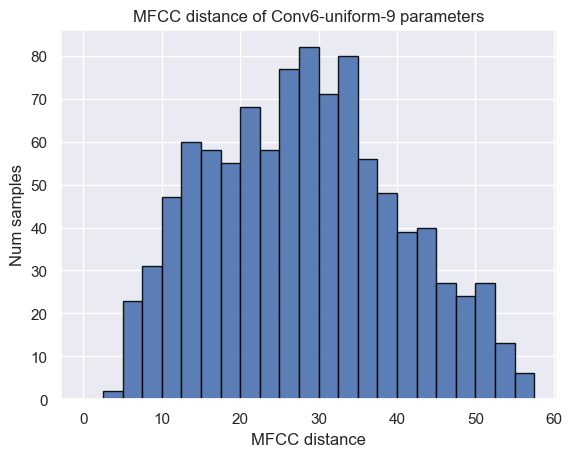

In [48]:
evaluation = spgl.evaluation.MFCCEval(true_audio, pred_audio[("uniform", 4)])
evaluation.evaluate()
stats = evaluation.get_stats()

print(stats)

bins = np.arange(0, 60, 2.5)
evaluation.plot_hist([0], 'mean_abs_error', bins)

plt.title("MFCC distance of Conv6-uniform-9 parameters")
plt.xlabel("MFCC distance")
plt.ylabel("Num samples")
plt.savefig("../data/plots/test2.png")
#plt.show()

